In this project, I have taken creditcard dataset which has samples labelled as "+" and "-". I have applied Logistic Regression and Decision Trees as classifier models to classify customer samples as "accepted" or "denied"

#### Exploratory Data Analysis

In [1]:
#Loading the comma seperated file which has no headers
data <- read.csv("creditapproval.txt", header = FALSE)

In [61]:
# Visualizing the first few records of the dataset
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [2]:
#providing the names to the columns
names(data)<-c("Male","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore","DriversLicense","Citizen","ZipCode","Income","Approved")

In [63]:
# To understand each variable in data
str(data)

'data.frame':	690 obs. of  16 variables:
 $ Male          : Factor w/ 3 levels "?","a","b": 3 2 2 3 3 3 3 2 3 3 ...
 $ Age           : Factor w/ 350 levels "?","13.75","15.17",..: 158 330 91 127 45 170 181 76 312 257 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : Factor w/ 4 levels "?","l","u","y": 3 3 3 3 3 3 3 3 4 4 ...
 $ BankCustomer  : Factor w/ 4 levels "?","g","gg","p": 2 2 2 2 2 2 2 2 4 4 ...
 $ EducationLevel: Factor w/ 15 levels "?","aa","c","cc",..: 14 12 12 14 14 11 13 4 10 14 ...
 $ Ethnicity     : Factor w/ 10 levels "?","bb","dd",..: 9 5 5 9 9 9 5 9 5 9 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ Employed      : Factor w/ 2 levels "f","t": 2 2 1 2 1 1 1 1 1 1 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ Citizen       : Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ ZipCo

From the above few commands, we can understand that the variable "Approved" is our target variable which we have to predict for unseen samples
    

However, we can see that the values of Approved are "+" and "-". These special characters are not eligible for the model. Therefore, transoforming them in to binary values

In [3]:
# Converting other categorial variables to binary values
data$Male<- ifelse(data$Male=="a",1,0)
data$Employed<- ifelse(data$Employed=="t",1,0)
data$PriorDefault<-ifelse(data$PriorDefault=="t",1,0)

str(data)

'data.frame':	690 obs. of  16 variables:
 $ Male          : num  0 1 1 0 0 0 0 1 0 0 ...
 $ Age           : Factor w/ 350 levels "?","13.75","15.17",..: 158 330 91 127 45 170 181 76 312 257 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : Factor w/ 4 levels "?","l","u","y": 3 3 3 3 3 3 3 3 4 4 ...
 $ BankCustomer  : Factor w/ 4 levels "?","g","gg","p": 2 2 2 2 2 2 2 2 4 4 ...
 $ EducationLevel: Factor w/ 15 levels "?","aa","c","cc",..: 14 12 12 14 14 11 13 4 10 14 ...
 $ Ethnicity     : Factor w/ 10 levels "?","bb","dd",..: 9 5 5 9 9 9 5 9 5 9 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Employed      : num  1 1 0 1 0 0 0 0 0 0 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ Citizen       : Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ ZipCode       : Factor w/ 171 levels "?","00000","00017",..: 70 13 98 33 39 11

In [4]:
# Convert credit granted to 1 or 0
data$Approved<-ifelse(data$Approved=="+",1,0)
data$Approved<-factor(data$Approved)



Handling Missing Data

In [5]:
#In the dataset, we can see above that the missing values are logged as special character "?", replacing it by NA
data[data=="?"]<-NA

In [6]:
head(data)

Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,30.83,0.000,u,g,w,v,1.25,1,1,1,f,g,00202,0,1
1,58.67,4.460,u,g,q,h,3.04,1,1,6,f,g,00043,560,1
1,24.50,0.500,u,g,q,h,1.50,1,0,0,f,g,00280,824,1
0,27.83,1.540,u,g,w,v,3.75,1,1,5,t,g,00100,3,1
0,20.17,5.625,u,g,w,v,1.71,1,0,0,f,s,00120,0,1
0,32.08,4.000,u,g,m,v,2.50,1,0,0,t,g,00360,0,1


In [7]:
# The below R commands are used to obtain the summary of the numeric values in the dataset
data$Age<-as.numeric(data$Age)
Numeric<- data[,c(2:3,8,11,15)] # Filtering out numerical variables

summary(Numeric)

Mean.Age<- mean(Numeric$Age,na.rm=T)

SD.Age<-round(sd(Numeric$Age, na.rm=T),4)
SD.Age


      Age              Debt        YearsEmployed     CreditScore  
 Min.   :  2.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.0  
 1st Qu.: 72.25   1st Qu.: 1.000   1st Qu.: 0.165   1st Qu.: 0.0  
 Median :133.50   Median : 2.750   Median : 1.000   Median : 0.0  
 Mean   :149.02   Mean   : 4.759   Mean   : 2.223   Mean   : 2.4  
 3rd Qu.:221.75   3rd Qu.: 7.207   3rd Qu.: 2.625   3rd Qu.: 3.0  
 Max.   :350.00   Max.   :28.000   Max.   :28.500   Max.   :67.0  
 NA's   :12                                                       
     Income        
 Min.   :     0.0  
 1st Qu.:     0.0  
 Median :     5.0  
 Mean   :  1017.4  
 3rd Qu.:   395.5  
 Max.   :100000.0  
                   

[1] 93.3046

In [67]:
round(cor(Numeric,use="complete.obs"),3)

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000,0.149,0.395,0.183,0.019
Debt,0.149,1.000,0.301,0.272,0.122
YearsEmployed,0.395,0.301,1.000,0.327,0.053
CreditScore,0.183,0.272,0.327,1.000,0.063
Income,0.019,0.122,0.053,0.063,1.000


In [68]:
AgeMdl<-lm(Age~YearsEmployed, data=data,na.action=na.exclude)
Missing<-which(is.na(data$Age))
data$Age[Missing]<- predict(AgeMdl,newdata=data[Missing,])

In [69]:
AgeMdl$coefficients

(Intercept) YearsEmployed 
    124.69348      11.00963

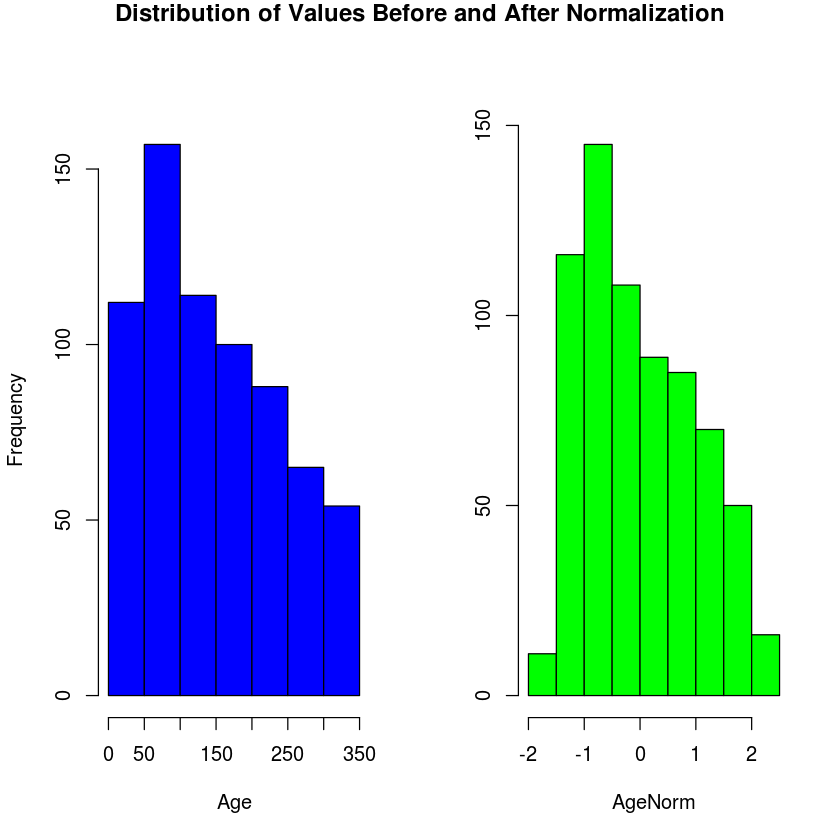

In [70]:
#Convert to z score
data$AgeNorm<- (data$Age-mean(data$Age, na.rm=T))/SD.Age
rm(SD.Age, Mean.Age)

# View the distribution
par(mfrow=c(1,2), oma=c(0,0,1,0))
hist(data$Age,main=NULL,xlab="Age",col="blue")
hist(data$AgeNorm,main=NULL,xlab="AgeNorm",ylab=NULL,col="green")
title("Distribution of Values Before and After Normalization",outer=T)


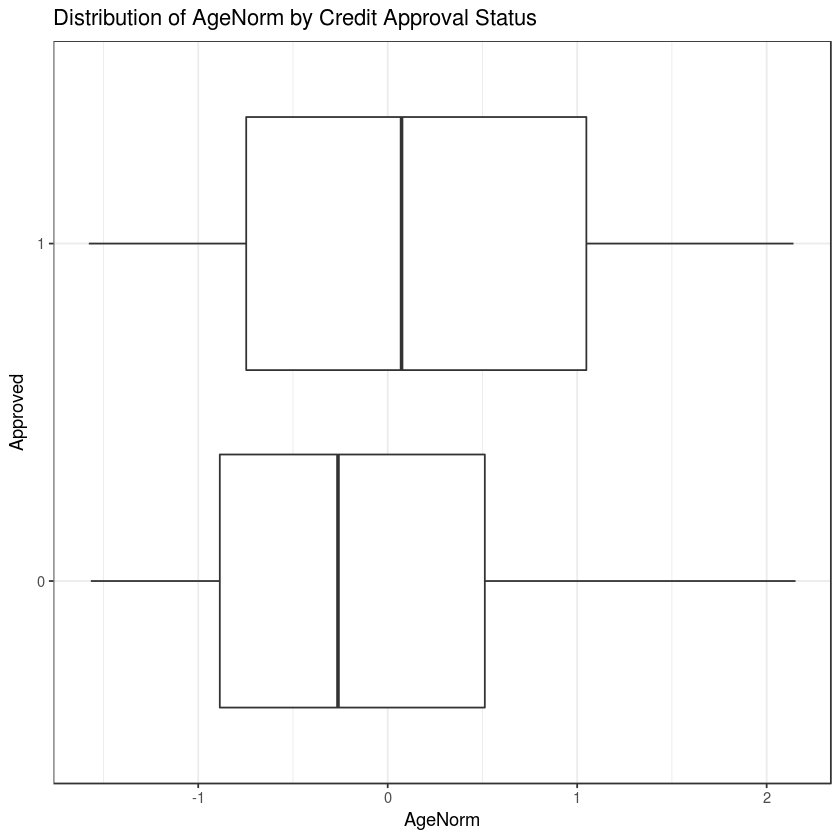

In [71]:
library(ggplot2)
ggplot(data) + 
    aes(Approved,AgeNorm) + 
    geom_boxplot(outlier.colour="red") +
    theme_bw() +
    coord_flip() +
    labs(title="Distribution of AgeNorm by Credit Approval Status")

In [72]:
Temp<- data.frame(scale(log(data[,c(3,8,11,15)]+1),center=T))
names(Temp)<-c("DebtLog","YearsEmployedLog","CreditScoreLog","IncomeLog")
data<-cbind(data,Temp)
rm(Temp)

In [73]:
head(data)

Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,⋯,DriversLicense,Citizen,ZipCode,Income,Approved,AgeNorm,DebtLog,YearsEmployedLog,CreditScoreLog,IncomeLog
0,158,0.000,u,g,w,v,1.25,1,1,⋯,f,g,00202,0,1,0.09461118,-1.6678914,-0.0332615,0.007182161,-0.9322207
1,330,4.460,u,g,q,h,3.04,1,1,⋯,f,g,00043,560,1,1.93803583,0.3503638,0.7424841,1.356847959,1.0529943
1,91,0.500,u,g,q,h,1.50,1,0,⋯,f,g,00280,824,1,-0.62346703,-1.1857961,0.1063779,-0.739580847,1.1739511
0,127,1.540,u,g,w,v,3.75,1,1,⋯,t,g,00100,3,1,-0.23763397,-0.5595546,0.9570579,1.190773525,-0.4974318
0,45,5.625,u,g,w,v,1.71,1,0,⋯,f,s,00120,0,1,-1.11647595,0.5803170,0.2132777,-0.739580847,-0.9322207
0,170,4.000,u,g,m,v,2.50,1,0,⋯,t,g,00360,0,1,0.22322220,0.2457195,0.5523208,-0.739580847,-0.9322207


In [74]:
table(data$Male,useNA="ifany")

incomplete<-!complete.cases(data)
ToImpute<-data[incomplete,]
#row.names(ToImpute)


  0   1 
480 210 

In [75]:
data$Married  <-ifelse(is.na(data$Married),"u",data$Married)
data$BankCustomer <-ifelse(is.na(data$BankCustomer),"g",data$BankCustomer)
data$Ethnicity  <-ifelse(is.na(data$Ethnicity),"v",data$Ethnicity)
data$EducationLevel<-ifelse(is.na(data$EducationLevel),"c",data$EducationLevel)
data$ZipCode  <-ifelse(is.na(data$ZipCode),"00000",data$ZipCode)
data$Male <-ifelse(is.na(data$Male),"b",data$Male)

In [76]:
# Convert categorical variables to factors
data[,1:10]<- lapply(data[1:10],function(x) factor(x))

data$Ethnicity<-relevel(data$Ethnicity,"v")

In [77]:
library(caTools)
set.seed(1234)

split<- sample.split(data$Approved, SplitRatio=0.75)
Train<- subset(data,split==TRUE)
Test <- subset(data, split==FALSE)

table(Train$Approved)
rm(split)



  0   1 
287 230 

In [78]:
head(Train)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,⋯,DriversLicense,Citizen,ZipCode,Income,Approved,AgeNorm,DebtLog,YearsEmployedLog,CreditScoreLog,IncomeLog
1,0,158,0,3,2,14,9,1.25,1,1,⋯,f,g,70,0,1,0.09461118,-1.6678914,-0.0332615,0.007182161,-0.9322207
2,1,330,4.46,3,2,12,5,3.04,1,1,⋯,f,g,13,560,1,1.93803583,0.3503638,0.7424841,1.356847959,1.0529943
3,1,91,0.5,3,2,12,5,1.5,1,0,⋯,f,g,98,824,1,-0.62346703,-1.1857961,0.1063779,-0.739580847,1.1739511
4,0,127,1.54,3,2,14,9,3.75,1,1,⋯,t,g,33,3,1,-0.23763397,-0.5595546,0.9570579,1.190773525,-0.4974318
6,0,170,4,3,2,11,9,2.5,1,0,⋯,t,g,117,0,1,0.22322220,0.2457195,0.5523208,-0.739580847,-0.9322207
7,0,181,1.04,3,2,13,5,6.5,1,0,⋯,t,g,56,31285,1,0.34111563,-0.8201989,1.5624219,-0.739580847,2.3141804


In [79]:
LogFit<- glm(Approved~AgeNorm+DebtLog+YearsEmployedLog+CreditScoreLog+IncomeLog, data=Train,family=binomial)
summary(LogFit)


Call:
glm(formula = Approved ~ AgeNorm + DebtLog + YearsEmployedLog + 
    CreditScoreLog + IncomeLog, family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4480  -0.7608  -0.4676   0.6884   2.2814  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.20751    0.11173  -1.857 0.063290 .  
AgeNorm          -0.01753    0.11936  -0.147 0.883263    
DebtLog           0.17205    0.11229   1.532 0.125472    
YearsEmployedLog  0.76862    0.12556   6.122 9.26e-10 ***
CreditScoreLog    0.98071    0.13315   7.366 1.76e-13 ***
IncomeLog         0.44726    0.11853   3.773 0.000161 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 710.42  on 516  degrees of freedom
Residual deviance: 501.22  on 511  degrees of freedom
AIC: 513.22

Number of Fisher Scoring iterations: 5


In [84]:
#Logistic Regression
LogPred<- predict(LogFit,newdata=Train, type="response")
cm1 = table(Train$Approved, LogPred>0.5)

 n = sum(cm1) # number of instances
 nc = nrow(cm1) # number of classes
 diag = diag(cm1) # number of correctly classified instances per class 
 rowsums = apply(cm1, 1, sum) # number of instances per class
 colsums = apply(cm1, 2, sum) # number of predictions per class
 p = rowsums / n # distribution of instances over the actual classes
 q = colsums / n # distribution of instances over the predicted classes

Accuracy of Logistic Regression Model

In [85]:
accuracy = sum(diag) / n 
accuracy


[1] 0.7756286

In [81]:
LogFit2<- glm(Approved~YearsEmployedLog+CreditScoreLog+IncomeLog, data=Train,family=binomial)
summary(LogFit2)



Call:
glm(formula = Approved ~ YearsEmployedLog + CreditScoreLog + 
    IncomeLog, family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4209  -0.7462  -0.4697   0.6973   2.1612  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.2070     0.1113  -1.861 0.062767 .  
YearsEmployedLog   0.7872     0.1193   6.598 4.16e-11 ***
CreditScoreLog     0.9910     0.1323   7.490 6.90e-14 ***
IncomeLog          0.4522     0.1185   3.817 0.000135 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 710.42  on 516  degrees of freedom
Residual deviance: 503.59  on 513  degrees of freedom
AIC: 511.59

Number of Fisher Scoring iterations: 5


In [82]:
LogPred2<- predict(LogFit2,newdata=Train, type="response")
table(Train$Approved, LogPred2>0.5)

   
    FALSE TRUE
  0   244   43
  1    78  152

In [83]:
# Apply the model to the test set
LogPred3<-predict(LogFit2, newdata=Test,type="response")
    
# Create a confusion Matrix
table(Test$Approved,LogPred3>0.5)

   
    FALSE TRUE
  0    83   13
  1    29   48